In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('flights.csv', low_memory=False)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


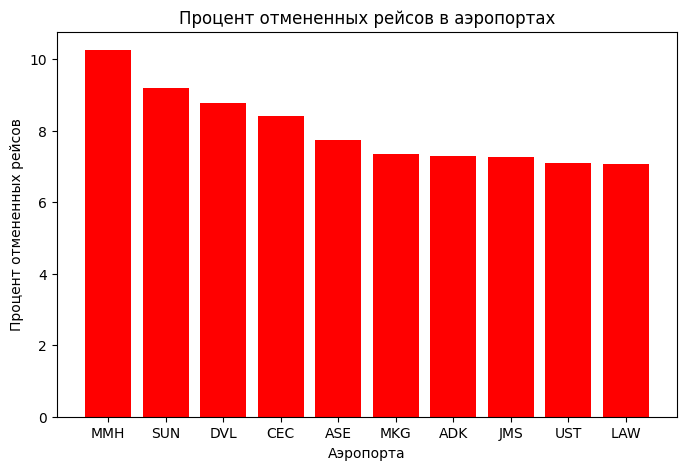

In [39]:
cancelled_flights = df[df['CANCELLED'] == 1]['ORIGIN_AIRPORT'].value_counts()
total_flights = df['ORIGIN_AIRPORT'].value_counts()
valid_airports = total_flights[total_flights > 50].index
cancelled_flights = cancelled_flights.reindex(valid_airports, fill_value=0)
total_flights = total_flights.reindex(valid_airports)
cancellation_ratio = (cancelled_flights / total_flights) * 100
cancellation_ratio = cancellation_ratio.sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
plt.bar(cancellation_ratio.index, cancellation_ratio.values, color='red')
plt.xlabel("Аэропорта")
plt.ylabel("Процент отмененных рейсов")
plt.title("Процент отмененных рейсов в аэропортах")
plt.xticks(range(0, 10), ['MMH', 'SUN', 'DVL', 'CEC', 'ASE', 'MKG', 'ADK', 'JMS', 'UST', 'LAW'])
plt.show()

В этих Аэропортах огромный процент отменненых рейсов, что влияет на доход с этих аэропортов. Стоит поработать над проблемами в них самих

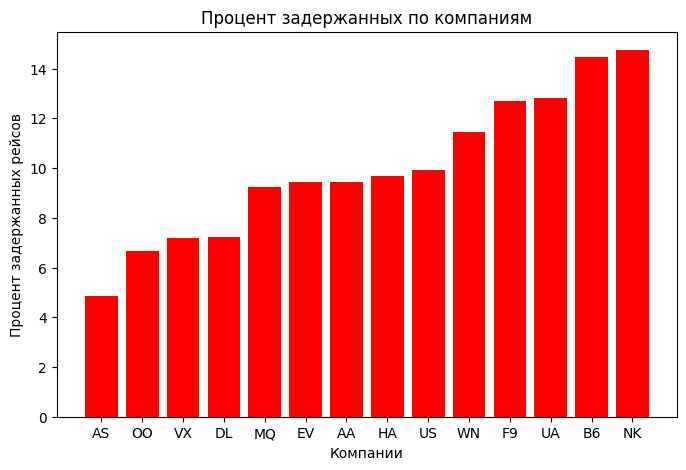

In [18]:
delayed_flights = df[df['AIRLINE_DELAY'] > 0]
delays_airlines = delayed_flights['AIRLINE'].value_counts()
total_flights = df['AIRLINE'].value_counts()
most_delayed_airline = delays_airlines.idxmax()
delay_percentage = (delays_airlines / total_flights * 100)
delay_percentage = delay_percentage.sort_values()
plt.figure(figsize=(8, 5))
plt.bar(delay_percentage.index, delay_percentage.values, color='red')
plt.xlabel("Компании")
plt.ylabel("Процент задержанных рейсов")
plt.title("Процент задержанных по компаниям")
plt.xticks(range(0, 14), ['AS', 'OO', 'VX', 'DL', 'MQ', 'EV', 'AA', 'HA', 'US', 'WN', 'F9', 'UA', 'B6', 'NK'])
plt.show()

Процент задержек рядом авиакомпаний очень большой, в то время как компания AS имеет таковых меньше 5 процентов.

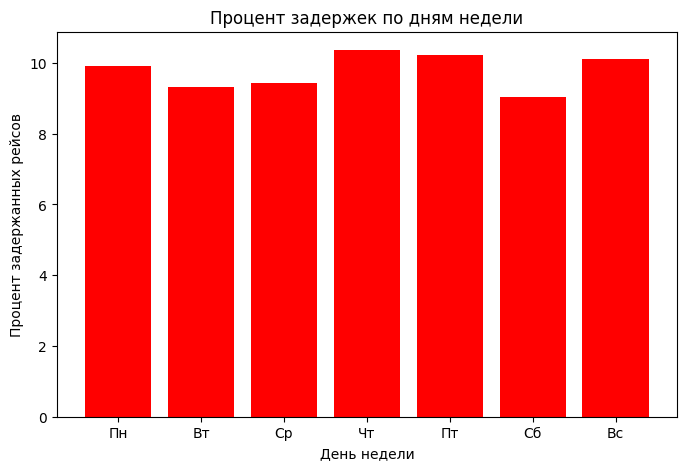

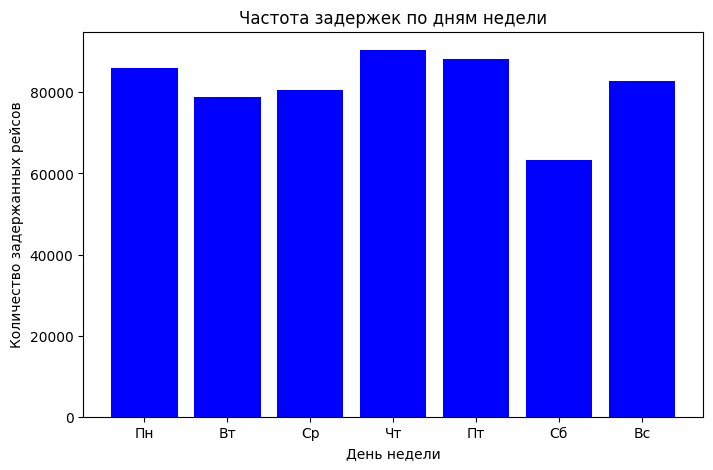

In [31]:
total_flights_by_day = df['DAY_OF_WEEK'].value_counts()
delay_ratio_by_day = (delays_by_day / total_flights_by_day * 100)
delay_ratio_by_day = delay_ratio_by_day.sort_values()
delayed_flights = df[df['AIRLINE_DELAY'] > 0]
delays_by_day = delayed_flights['DAY_OF_WEEK'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(delay_ratio_by_day.index, delay_ratio_by_day.values, color='red')
plt.xlabel("День недели")
plt.ylabel("Процент задержанных рейсов")
plt.title("Процент задержек по дням недели")
plt.xticks(range(1, 8), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()
plt.figure(figsize=(8, 5))
plt.bar(delays_by_day.index, delays_by_day.values, color='blue')
plt.xlabel("День недели")
plt.ylabel("Количество задержанных рейсов")
plt.title("Частота задержек по дням недели")
plt.xticks(range(1, 8), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

Эти графики очень симметричны, из чего просится вывод, что частота задержек напрямую зависит от нагруженности дня.

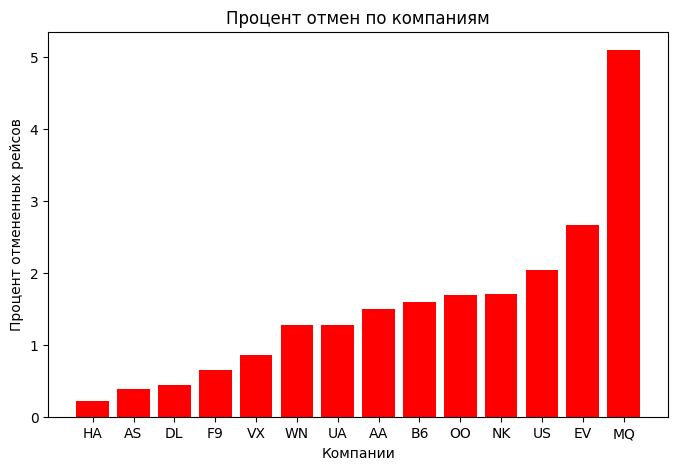

In [19]:
cancelled_flights = df[df['CANCELLED'] == 1]['AIRLINE'].value_counts()
cancellation_ratio = (cancelled_flights / total_flights * 100)
cancellation_ratio = cancellation_ratio.sort_values()
plt.figure(figsize=(8, 5))
plt.bar(cancellation_ratio.index, cancellation_ratio.values, color='red')
plt.xlabel("Компании")
plt.ylabel("Процент отмененных рейсов")
plt.title("Процент отмен по компаниям")
plt.xticks(range(0, 14), ['HA', 'AS', 'DL', 'F9', 'VX', 'WN', 'UA', 'AA', 'B6', 'OO', 'NK', 'US', 'EV', 'MQ'])
plt.show()


Компании, в особенности MQ, часто отменяют свои рейсы, что сказывается на статистике и доходности. Есть предложение поддержать компании с маленьким процентом отменненых рейсов.

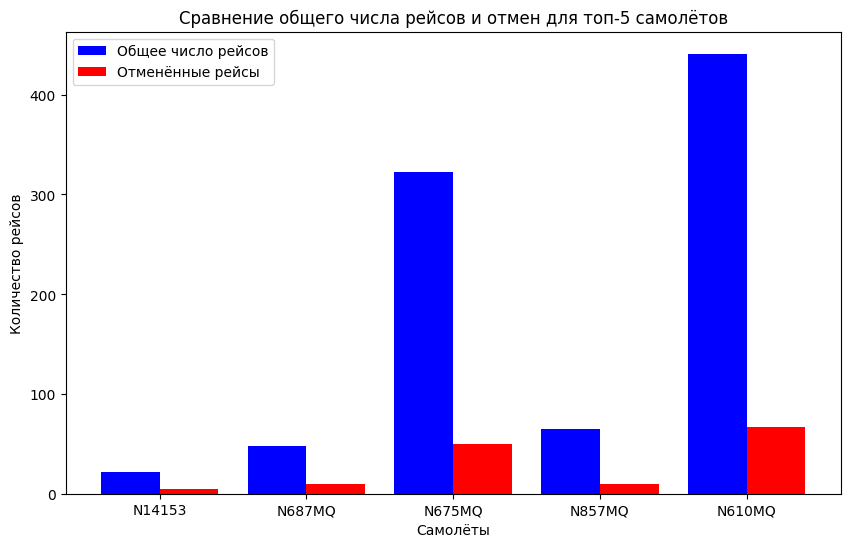

In [37]:
total_flights_per_plane = df['TAIL_NUMBER'].value_counts()
cancelled_flights_per_plane = df[df['CANCELLED'] == 1]['TAIL_NUMBER'].value_counts()
cancellation_ratio_planes = (cancelled_flights_per_plane / total_flights_per_plane * 100)
cancellation_ratio_planes = cancellation_ratio_planes.fillna(0)
active_planes = total_flights_per_plane[total_flights_per_plane > 16]
cancellation_ratio_active_planes = cancellation_ratio_planes[active_planes.index]
top_5_cancelled_planes = cancellation_ratio_active_planes.sort_values(ascending=False).head(5)
top_5_planes = top_5_cancelled_planes.index
total_flights_top5 = total_flights_per_plane[top_5_planes]
cancelled_flights_top5 = cancelled_flights_per_plane[top_5_planes].fillna(0)
x = np.arange(len(top_5_planes))  
width = 0.4
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, total_flights_top5, width, label="Общее число рейсов", color='blue')
plt.bar(x + width/2, cancelled_flights_top5, width, label="Отменённые рейсы", color='red')
plt.xlabel("Самолёты")
plt.ylabel("Количество рейсов")
plt.title("Сравнение общего числа рейсов и отмен для топ-5 самолётов")
plt.xticks(x, top_5_planes)
plt.legend()

Эти 5 самолетов можно назвать регулярными в использовании(больше 16 полетов за год) и у них огромное количество отмен рейс в отличие от других самолётов. Нужно сделать их менее регулярными, поменяв самолёты на более надежные